# Linear Regression

In [231]:
"""
cd .\07linear_regression_i\
jupyter nbconvert --to markdown lin_r.ipynb --output README.md
"""
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')


## Load DataSet

[Weight-Height](https://www.kaggle.com/sonalisingh1411/linear-regression-using-weight-height/data)

In [232]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [148]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


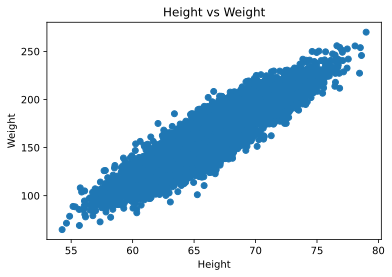

In [147]:
plt.scatter(x=df['Height'], y=df["Weight"])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()


## Generating our Own data

For linear relationship : `y=βx+ϵ`

In [225]:
scale = 2
e = np.random.randn(100)*scale
e[:20]


array([ 0.04693432,  1.20214524,  1.1497429 ,  1.4257632 , -0.64547834,
        1.43834381,  1.12207361,  1.89293863,  0.47506907, -0.85878863,
        2.06764893, -0.08994633,  1.67588997,  3.02959755,  2.15196952,
       -1.39025646,  0.08985833, -0.38396899, -1.53876122,  0.44887422])

In [226]:
start = 65
end = 78

x = np.random.rand(100)*(end-start) + start
x[:20]


array([73.26670775, 71.4196531 , 67.26907155, 76.975376  , 72.3407478 ,
       67.28465027, 76.34896376, 71.10362274, 69.81645041, 71.99670736,
       69.10856961, 70.90860807, 77.14039143, 71.04797257, 66.04579698,
       72.0600471 , 66.61973751, 67.86272319, 65.55034215, 67.13162103])

In [227]:
y = x * 2 + e

In [228]:
df_gen = pd.DataFrame({'Weight':y , 'Height':x })
df_gen.head()


,Weight,Height
0,146.580350,73.266708
1,144.041451,71.419653
2,135.687886,67.269072
3,155.376515,76.975376
4,144.036017,72.340748


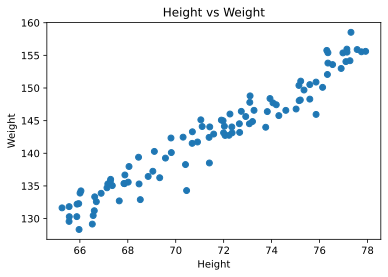

In [229]:
plt.scatter(x=df_gen['Height'], y=df_gen["Weight"])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()


In [230]:
df_gen.to_csv('weight-height_gen.csv')

## Process Data

In [235]:
x= df['Height']
# x= df.iloc[:,1]
y= df['Weight']


In [242]:
x.shape

(10000,)

In [243]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    x, y, test_size=0.3)
X_train.shape


(7000,)

## Train Model - fit

In [244]:
def fit(x_train, y_train):
    num = (x_train*y_train).mean() - x_train.mean() * y_train.mean()
    den = (x_train**2).mean() - x_train.mean()**2
    m = num/den
    c = y_train.mean() - m * x_train.mean()
    return m, c


In [245]:
def predict(x, m, c):
    return m * x + c


def score(y_truth, y_pred):
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth - y_truth.mean())**2).sum()
    return 1 - u/v



In [281]:
m, c = fit(X_train, Y_train)

## Predict and Score

In [280]:
# test data
y_test_pred = predict(X_test, m, c)
print(f"Test Score: {round(score(Y_test, y_test_pred)*100)}%")

Test Score: 85%


[55.  55.1 55.2 55.3 55.4] [79.5 79.6 79.7 79.8 79.9]


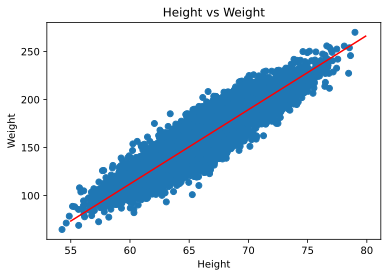

In [273]:
x_line = np.arange(55, 80, 0.1)
print(x_line[:5], x_line[-5:])
y_line = m*x_line + c
plt.plot(x_line, y_line,"r")
plt.scatter(x=df['Height'], y=df["Weight"])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()


In [276]:
#train data
y_train_pred = predict(X_train, m, c)
print(f"Train Score: {round(score(Y_train, y_train_pred)*100)}%")


Train Score: 86%
Cost on training data  148.4278600984914


In [277]:
def cost(x, y, m, c):
    return ((y - m * x - c)**2).mean()


In [278]:
print("Cost on training data ", cost(X_train, Y_train, m, c))


Cost on training data  148.4278600984914
